In [ ]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

## Load Dataset

In [ ]:
url = "https://raw.githubusercontent.com/MNLGHTZS/AFL-2-Kelompok-4/refs/heads/main/customer_analysis.csv"
df = pd.read_csv(url, delimiter=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


## EDA

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Contoh penggunaan:
df = handle_outliers_iqr(df, 'Income')

In [ ]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Select non-numeric columns (object type)
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to non-numeric columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df = df.drop(['Education','Marital_Status','Dt_Customer','Z_CostContact', 'Z_Revenue'],axis=1)

In [ ]:
object_cols = df.select_dtypes(include=['object']).columns

for i in object_cols:
    # Convert the column to int
    df[i] = df[i].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2208 non-null   int64  
 1   Year_Birth           2208 non-null   int64  
 2   Income               2208 non-null   float64
 3   Kidhome              2208 non-null   int64  
 4   Teenhome             2208 non-null   int64  
 5   Recency              2208 non-null   int64  
 6   MntWines             2208 non-null   int64  
 7   MntFruits            2208 non-null   int64  
 8   MntMeatProducts      2208 non-null   int64  
 9   MntFishProducts      2208 non-null   int64  
 10  MntSweetProducts     2208 non-null   int64  
 11  MntGoldProds         2208 non-null   int64  
 12  NumDealsPurchases    2208 non-null   int64  
 13  NumWebPurchases      2208 non-null   int64  
 14  NumCatalogPurchases  2208 non-null   int64  
 15  NumStorePurchases    2208 non-null   int64 

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )

## K-Means Clustering

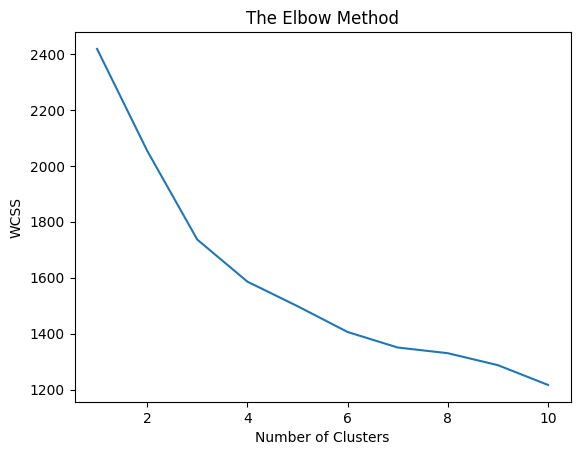

In [ ]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Determine the optimal number of clusters using the knee locator
knee = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print(f"Optimal number of clusters: {knee.elbow}")

Optimal number of clusters: 4


In [ ]:
# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=knee.elbow, random_state=0)
df['cluster'] = kmeans.fit_predict(scaled_df)

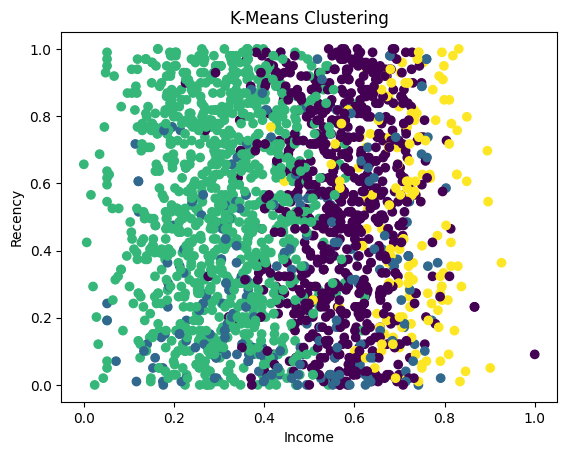

In [ ]:
# Visualize the clusters (example with two features)
plt.scatter(scaled_df['Income'], scaled_df['Recency'], c=df['cluster'])
plt.title('K-Means Clustering')
plt.xlabel('Income')
plt.ylabel('Recency')
plt.show()

In [ ]:
# Evaluate cluster quality
print(f"Davies-Bouldin Score: {davies_bouldin_score(scaled_df, df['cluster'])}")
print(f"Silhouette Score: {silhouette_score(scaled_df, df['cluster'])}")

Davies-Bouldin Score: 1.741385205386786
Silhouette Score: 0.20218658447301494


In [ ]:
# Profiling Cluster
for i in range(knee.elbow):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i][['Income', 'Recency', 'MntWines']].describe())

Cluster 0:
              Income     Recency     MntWines
count     766.000000  766.000000   766.000000
mean    66117.946475   51.245431   497.613577
std     11051.085560   28.529124   263.547398
min     26997.000000    0.000000     6.000000
25%     59066.750000   27.000000   294.250000
50%     66476.000000   53.000000   456.500000
75%     74104.000000   75.000000   642.000000
max    113734.000000   99.000000  1396.000000
Cluster 1:
             Income     Recency     MntWines
count    237.000000  237.000000   237.000000
mean   51111.046414   32.421941   346.202532
std    20753.796412   26.898413   345.389465
min     7500.000000    0.000000     1.000000
25%    35860.000000   10.000000    45.000000
50%    48948.000000   26.000000   216.000000
75%    68281.000000   53.000000   556.000000
max    91700.000000   98.000000  1332.000000
Cluster 2:
             Income      Recency     MntWines
count   1037.000000  1037.000000  1037.000000
mean   36125.483124    51.073288    63.234330
std    128

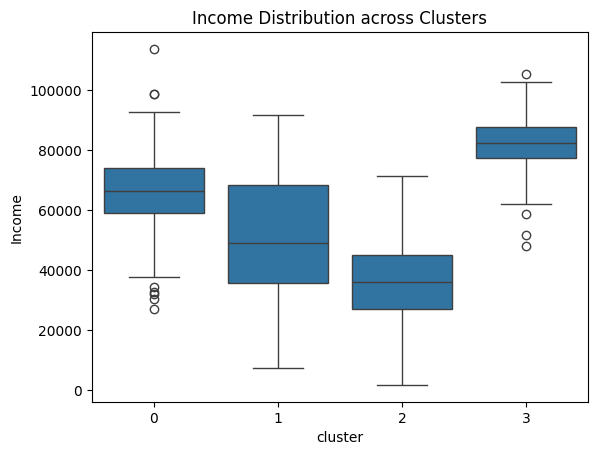

In [ ]:
# Visualisasi Box Plot
sns.boxplot(x='cluster', y='Income', data=df)
plt.title('Income Distribution across Clusters')
plt.show()

## Hierarchical Clustering

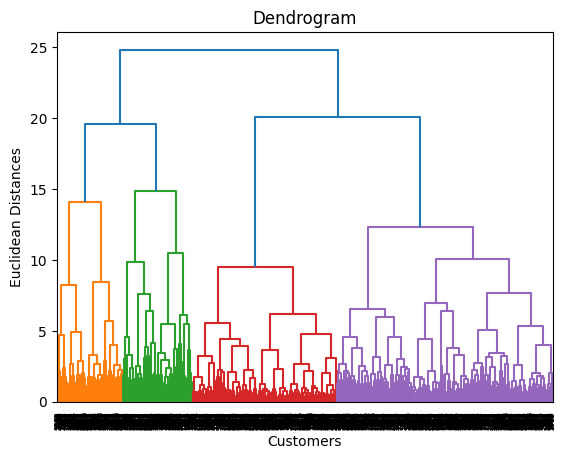

In [ ]:
# Create the dendrogram
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
# Fit the Agglomerative Clustering model
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['h_cluster'] = hc.fit_predict(scaled_df)

In [ ]:
# Evaluate cluster quality
print(f"Davies-Bouldin Score (Hierarchical): {davies_bouldin_score(scaled_df, df['h_cluster'])}")
print(f"Silhouette Score (Hierarchical): {silhouette_score(scaled_df, df['h_cluster'])}")

Davies-Bouldin Score (Hierarchical): 2.378511206675174
Silhouette Score (Hierarchical): 0.09972272935622635


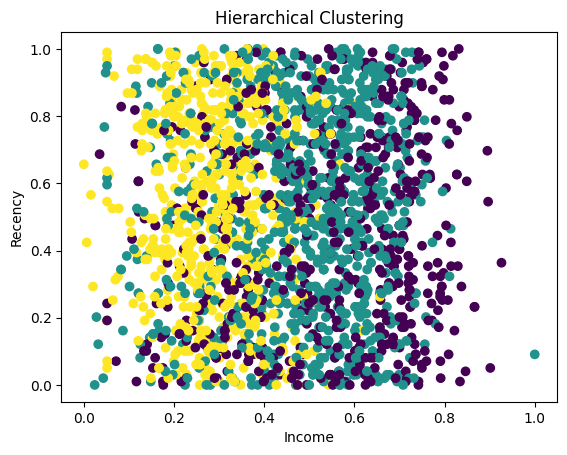

In [ ]:
# Visualize the clusters (example with two features)
plt.scatter(scaled_df['Income'], scaled_df['Recency'], c=df['h_cluster'])
plt.title('Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Recency')
plt.show()

In [ ]:
# Profiling Cluster (Hierarchical)
for i in range(3):
    print(f"Hierarchical Cluster {i}:")
    print(df[df['h_cluster'] == i][['Income', 'Recency', 'MntWines']].describe())

Hierarchical Cluster 0:
              Income     Recency     MntWines
count     604.000000  604.000000   604.000000
mean    61791.107616   44.188742   538.395695
std     21410.670051   29.309706   405.080842
min      5648.000000    0.000000     0.000000
25%     45198.000000   18.750000   161.250000
50%     64781.000000   40.000000   508.500000
75%     79638.750000   69.000000   896.250000
max    105471.000000   99.000000  1493.000000
Hierarchical Cluster 1:
              Income     Recency     MntWines
count     961.000000  961.000000   961.000000
mean    56850.623309   50.207076   339.346514
std     17657.751571   28.904869   271.063779
min      4428.000000    0.000000     0.000000
25%     46681.000000   26.000000   112.000000
50%     59809.000000   51.000000   290.000000
75%     69755.000000   74.000000   513.000000
max    113734.000000   99.000000  1396.000000
Hierarchical Cluster 2:
             Income     Recency    MntWines
count    643.000000  643.000000  643.000000
mean   34295

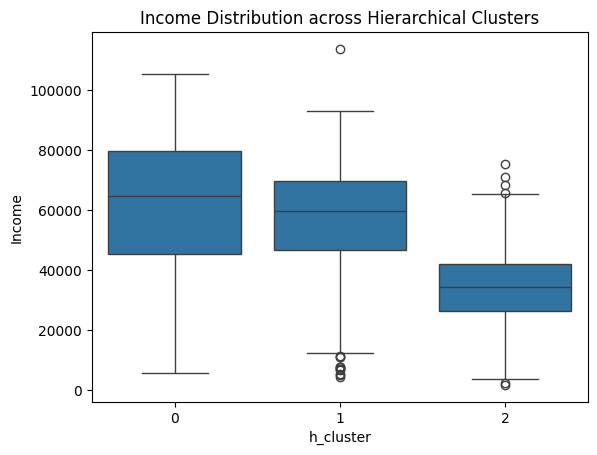

In [ ]:
# Visualisasi Box Plot (Hierarchical)
sns.boxplot(x='h_cluster', y='Income', data=df)
plt.title('Income Distribution across Hierarchical Clusters')
plt.show()

## Conclusion

In [ ]:
# prompt: create conclusion between kmeans Clustering and hierarchyial clustering

# ## Conclusion

# Based on the analysis, both K-means and hierarchical clustering provide valuable insights into customer segmentation.  K-means, guided by the elbow method, identified an optimal number of clusters (replace with the actual optimal k from the output).  Hierarchical clustering, visualized through a dendrogram, allowed for a selection of clusters based on the distance threshold.

# Evaluation metrics like Davies-Bouldin and Silhouette scores can help compare the two methods and choose which one better groups customers.  Lower Davies-Bouldin and higher Silhouette scores indicate better-defined clusters.  (Compare the scores obtained for both methods).

# The cluster profiles, revealed through descriptive statistics (mean, standard deviation, etc.) for key features like 'Income', 'Recency', and 'MntWines', highlight distinct customer behaviors within each segment.  Visualizations like box plots further illustrate these differences, particularly in income distribution.

# The choice between K-means and hierarchical clustering depends on the specific business problem and the desired level of detail in customer segmentation.  K-means is computationally efficient for large datasets, whereas hierarchical clustering provides a more detailed hierarchy and can be useful for exploring different levels of granularity.